In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['NH3y1', 'NH3y2', 'NH3y3','year', 'month', 'day']]
Y1 = df['NH3']

In [8]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [9]:
grad_boost = GradientBoostingRegressor(n_estimators=1500,
                                      max_depth=8,
                                      max_features=0.2,
                                      min_samples_split=4,
                                      min_samples_leaf=6,
                                      learning_rate=0.01)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.01, max_depth=8, max_features=0.2,
                          min_samples_leaf=6, min_samples_split=4,
                          n_estimators=1500)

In [10]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9892392570881204

Score on test data: -5.430100446296528

Root Mean Squared Error: 12.99950037293052

Overall model accuracy: -5.430100446296528


In [11]:
test=data.loc['207':'259']
X=test[['NH3y1', 'NH3y2', 'NH3y3','year', 'month', 'day']]
X

,NH3y1,NH3y2,NH3y3,year,month,day
207,32.607143,42.882857,56.007143,2019,12,29
208,29.011429,43.077143,57.234286,2020,1,5
209,31.015714,35.634286,48.108571,2020,1,12
210,28.408571,38.150000,43.388571,2020,1,19
211,23.565714,34.502857,44.487143,2020,1,26
212,23.558571,19.232857,42.347143,2020,2,2
213,22.507143,38.404286,39.584286,2020,2,9
214,27.225714,33.808571,30.340000,2020,2,16
215,27.742857,39.555714,37.265714,2020,2,23
216,27.334286,38.014286,26.370000,2020,3,1


In [12]:
predict=grad_boost.predict(X)

In [13]:
predict

array([33.61399186, 43.87519373, 44.52560771, 37.36876247, 35.99484986,
       32.39399577, 40.63748655, 29.69896297, 29.55966816, 35.20889676,
       32.89742131, 27.05580994, 31.00760896, 27.24876109, 33.23909459,
       29.70979306, 26.47331242, 26.4632107 , 37.83936795, 34.97353637,
       28.35189015, 26.49582254, 27.91422648, 41.23222039, 32.40278716,
       32.4493976 , 28.52269155, 37.21220515, 37.16769067, 32.28188529,
       20.7905408 , 16.71230785, 15.70865648, 24.85301475, 21.52451204,
       23.57125317, 14.62405977, 13.95227106, 20.77263676, 19.15991616,
       30.78117735, 38.05893191, 36.91516507, 37.68926757, 35.3547159 ,
       35.45935459, 32.6629349 , 35.04948904, 38.45368915, 42.40948685,
       39.80516916, 41.94971955, 34.44903369])

In [14]:
dates=data.loc['207':'259','From Date']

In [15]:
X['From Date']=dates.values

In [16]:
X.columns

Index(['NH3y1', 'NH3y2', 'NH3y3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [17]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [18]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [19]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [20]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

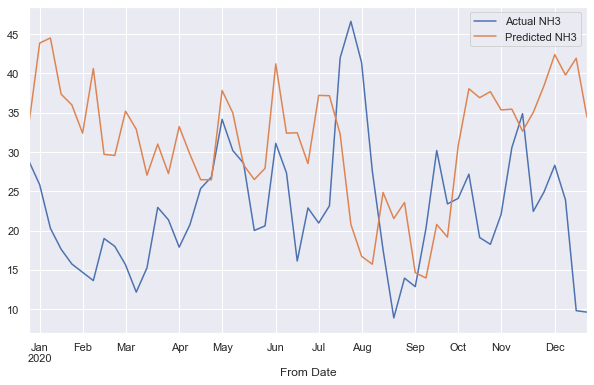

In [21]:
test['NH3'].plot(legend=True, label='Actual NH3', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NH3')

In [22]:
np.sqrt(mean_squared_error(test['NH3'],X['pred']))

14.339299019401274

In [23]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 10.556592318802823
MSE: 168.98700994582072
RMSE: 12.99950037293052
R-Squared: -5.430100446296528


In [24]:
mae = metrics.mean_absolute_error(test['NH3'],X['pred'])
mse = metrics.mean_squared_error(test['NH3'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NH3'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 12.222740342710663
MSE: 205.61549636780234
RMSE: 14.339299019401274
R-Squared: -2.23861655638221


In [25]:
import pickle
filename = 'NH3_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [26]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

-5.430100446296528


# 3rd plot

In [27]:
testcase = pd.DataFrame()

In [28]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [29]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [30]:
testcase

,test,pred,Corrected
155,32.607143,32.776317,19.776817
156,29.011429,39.669420,26.669920
157,31.015714,36.064250,23.064750
158,28.408571,40.510421,27.510921
159,23.565714,38.506190,25.506690
160,23.558571,35.120470,22.120970
161,22.507143,41.838733,28.839233
162,27.225714,32.017833,19.018332
163,27.742857,33.365576,20.366076
164,27.334286,37.114237,24.114737


In [31]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [32]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

-0.07322493259520013

In [33]:
test2020=pd.DataFrame()

In [34]:
test2020['test']=test['NH3']
test2020['pred']=X['pred']

In [35]:
test2020.index=test.index

In [36]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

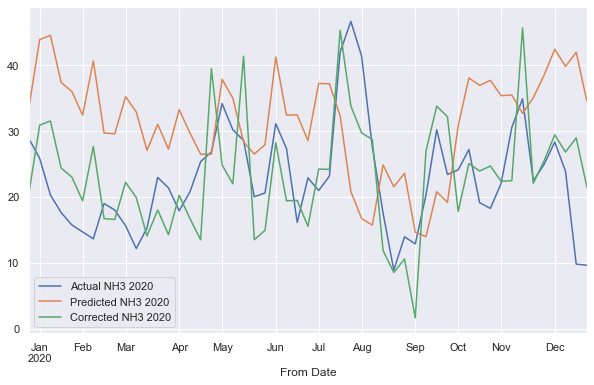

In [37]:
test2020['test'].plot(legend=True, label='Actual NH3 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NH3 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NH3 2020')

In [38]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.24006319001037302